In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data=pd.read_csv("E:\\project\\netflix_dataset.csv")

In [16]:
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [18]:
data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [19]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'], errors='coerce')

In [20]:
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [21]:
data['Duration_min'] = data['Duration'].str.extract('(\d+)').astype(float)

In [22]:
data.loc[data['Duration'].str.contains("Season"), 'Duration_min'] = data['Duration_min'] * 120  # assuming an average season length as 120 minutes per episode

In [23]:
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_min
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,480.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123.0


In [24]:
data['Director'].fillna('Unknown', inplace=True)
data['Cast'].fillna('Unknown', inplace=True)
data['Country'].fillna('Unknown', inplace=True)

In [25]:
data.dropna(subset=['Release_Date', 'Rating'], inplace=True)

In [26]:
data.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Duration_min    0
dtype: int64

In [27]:
data.shape

(7772, 12)

In [29]:
country_counts = data['Country'].value_counts().head(10)
country_counts

United States     2547
India              923
Unknown            505
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: Country, dtype: int64

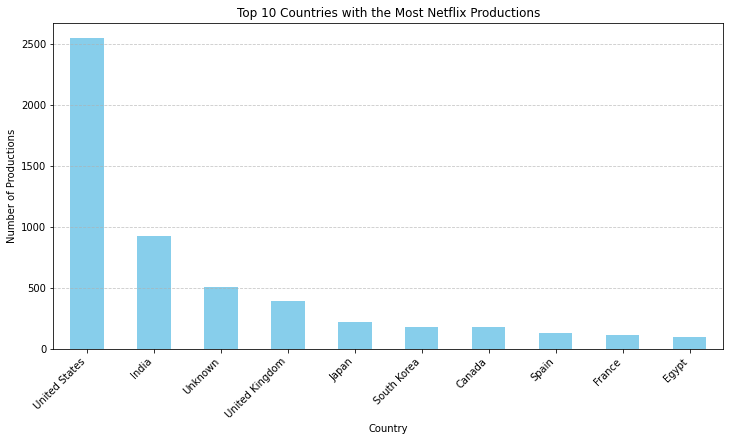

In [30]:
#Distribution of Netflix Productions by Country
plt.figure(figsize=(12,6))
country_counts.plot(kind='bar',color='skyblue')
plt.title('Top 10 Countries with the Most Netflix Productions')
plt.xlabel('Country')
plt.ylabel('Number of Productions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


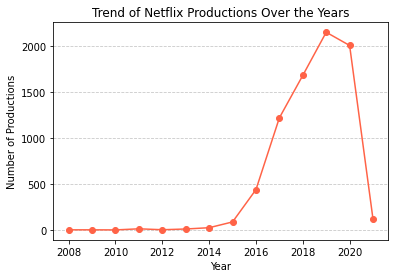

In [40]:
#Analysis of Production Trends by Year
data['year']= data['Release_Date'].dt.year
year_count=data['year'].value_counts().sort_index()

plt.Figure(figsize=(20,7))
year_count.plot(kind='line', marker='o', color='tomato')
plt.title('Trend of Netflix Productions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Productions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

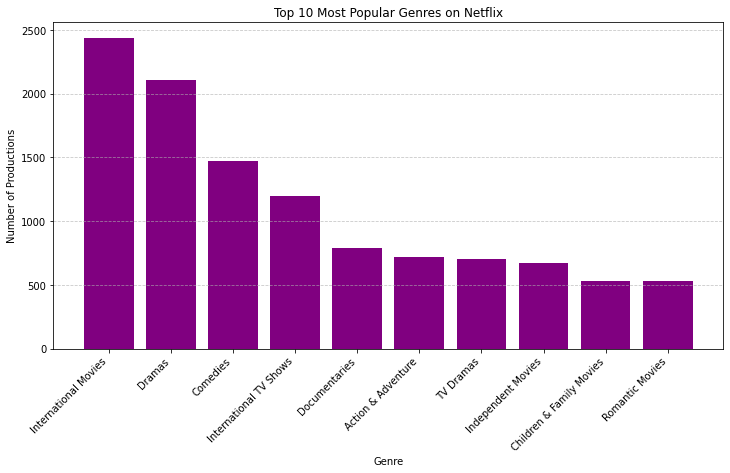

In [41]:
#Examination of Genre Popularity
from collections import Counter

genre_counts = Counter([genre.strip() for sublist in data['Type'].dropna().str.split(',') for genre in sublist])

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).head(10)


plt.figure(figsize=(12, 6))
plt.bar(genre_df['Genre'], genre_df['Count'], color='purple')
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Productions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

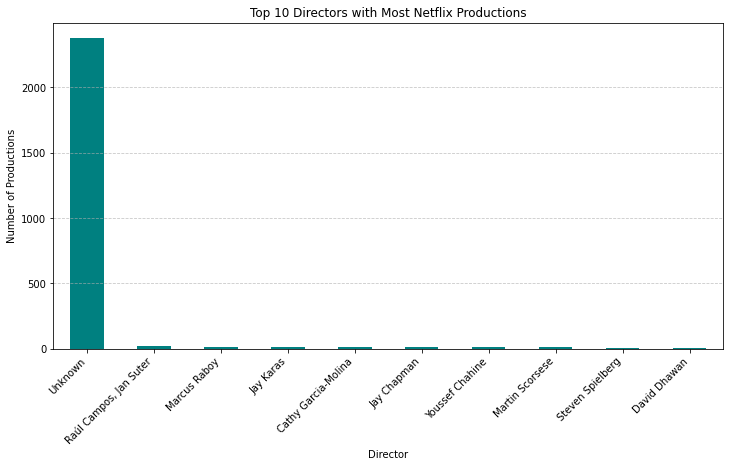

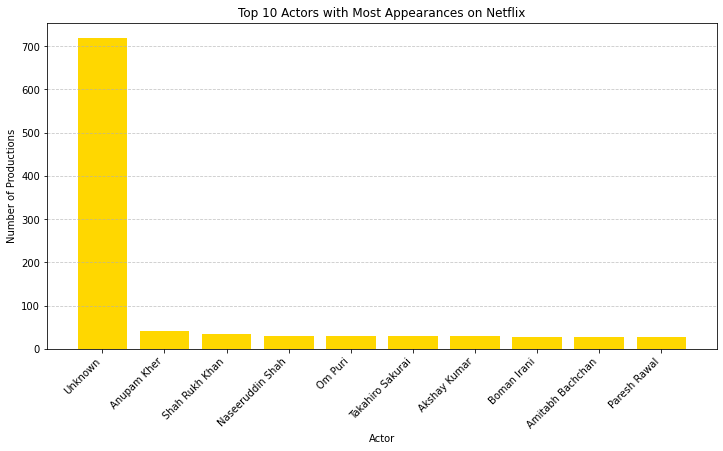

In [43]:

director_counts = data['Director'].value_counts().head(10)


cast_list = [actor.strip() for sublist in data['Cast'].dropna().str.split(',') for actor in sublist]
cast_counts = Counter(cast_list).most_common(10)


cast_df = pd.DataFrame(cast_counts, columns=['Actor', 'Count'])


plt.figure(figsize=(12, 6))
director_counts.plot(kind='bar', color='teal')
plt.title('Top 10 Directors with Most Netflix Productions')
plt.xlabel('Director')
plt.ylabel('Number of Productions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(cast_df['Actor'], cast_df['Count'], color='gold')
plt.title('Top 10 Actors with Most Appearances on Netflix')
plt.xlabel('Actor')
plt.ylabel('Number of Productions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
